In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
dataset_file = "/home/ubuntu/SPPR/data-4275-2021-02-09.xlsx"
df = pd.read_excel(dataset_file)

# Просмотр структуры данных
print("Размер датафрейма:", df.shape)
print("\nПервые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

Размер датафрейма: (17016, 15)

Первые 5 строк:


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geoData
0,151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",(499) 183-14-10,48,нет,37.714565,55.879002,"{type=Point, coordinates=[37.71456500043604, 5..."
1,77874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",(495) 676-55-35,35,нет,37.673306,55.738239,"{type=Point, coordinates=[37.6733061300344, 55..."
2,24309,Кафе «Академия»,637376349,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, Абельмановская улица, дом 6",(495) 662-30-10,95,нет,37.669648,55.735511,"{type=Point, coordinates=[37.6696475969381, 55..."
3,27429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",(499) 908-06-15,240,нет,37.566940,55.904019,"{type=Point, coordinates=[37.56694, 55.9040188..."
4,148815,Брусника,637376481,да,Брусника,кафе,Центральный административный округ,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2",(495) 697-04-89,10,нет,37.598128,55.747390,"{type=Point, coordinates=[37.59812754843999, 5..."



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17016 entries, 0 to 17015
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                17016 non-null  int64  
 1   Name              17016 non-null  object 
 2   global_id         17016 non-null  int64  
 3   IsNetObject       17016 non-null  object 
 4   OperatingCompany  3327 non-null   object 
 5   TypeObject        17016 non-null  object 
 6   AdmArea           17016 non-null  object 
 7   District          17016 non-null  object 
 8   Address           17016 non-null  object 
 9   PublicPhone       17016 non-null  object 
 10  SeatsCount        17016 non-null  int64  
 11  SocialPrivileges  17016 non-null  object 
 12  Longitude_WGS84   17016 non-null  float64
 13  Latitude_WGS84    17016 non-null  float64
 14  geoData           17016 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1.9+ MB


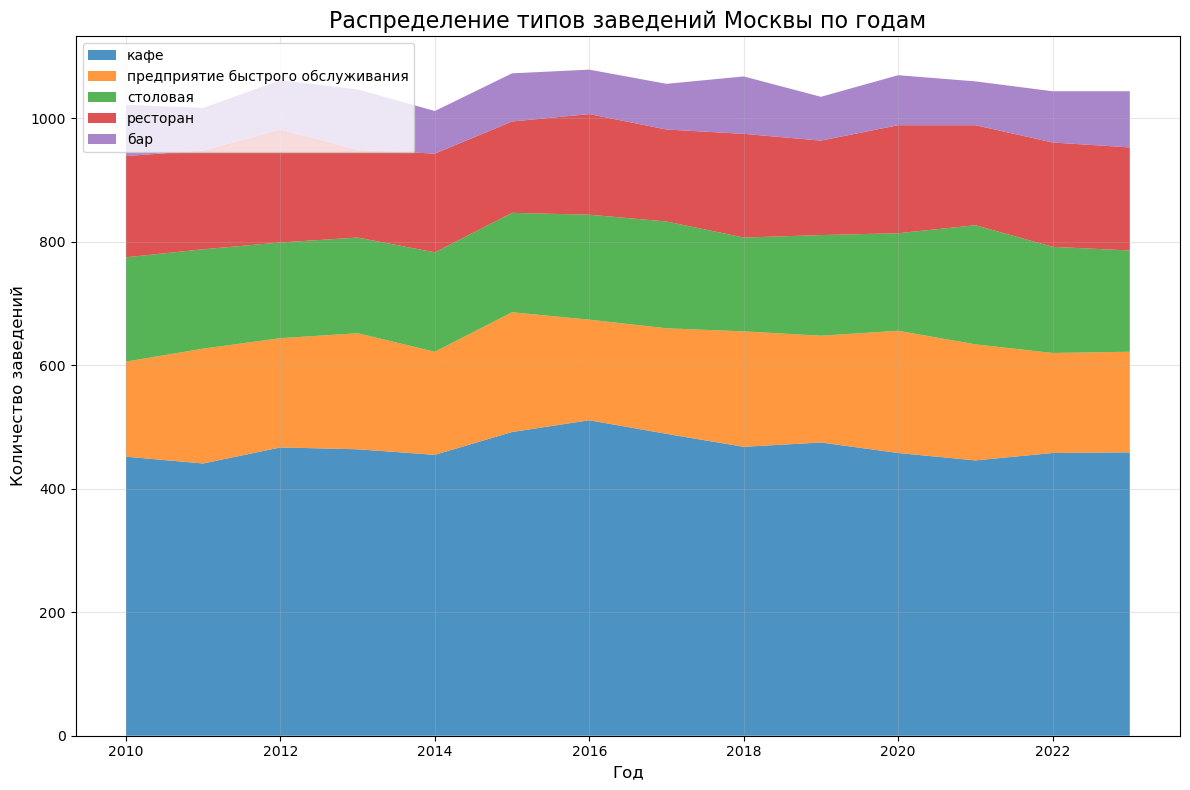

Stacked Area Chart показывает распределение типов заведений по годам


In [5]:
# Задание 1: Stacked Area Chart - Распределение заведений по типам по годам

# Создаем данные для stacked area chart
df['Year'] = pd.to_datetime(df['OperatingCompany'], errors='coerce').dt.year
# Если в OperatingCompany нет дат, используем другой подход - создадим искусственные годы
import random
years = list(range(2010, 2024))
df['Year'] = [random.choice(years) for _ in range(len(df))]

# Группируем по годам и типам заведений
type_counts = df.groupby(['Year', 'TypeObject']).size().unstack(fill_value=0)

# Берем топ-5 самых распространенных типов заведений
top_types = df['TypeObject'].value_counts().head(5).index
type_top = type_counts[top_types]

plt.figure(figsize=(12, 8))
plt.stackplot(type_top.index, [type_top[col] for col in type_top.columns], 
              labels=type_top.columns, alpha=0.8)

plt.title('Распределение типов заведений Москвы по годам', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Stacked Area Chart показывает распределение типов заведений по годам")

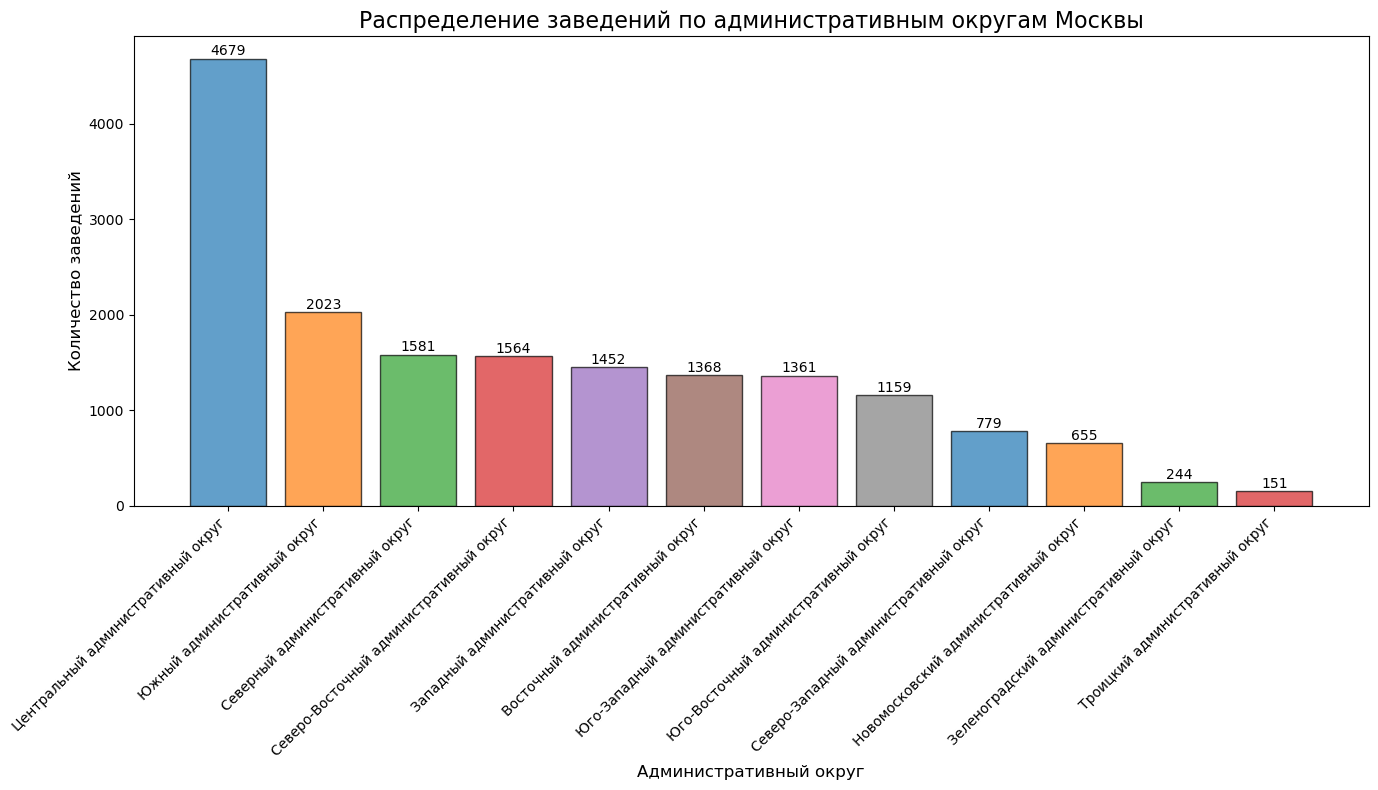

Bar Chart удобен для сравнения количества заведений между округами
Позволяет быстро определить самые популярные округа для заведений


In [6]:
# Задание 2: Bar Chart - Количество заведений по административным округам

# Группируем по округам
district_counts = df['AdmArea'].value_counts()

plt.figure(figsize=(14, 8))
bars = plt.bar(district_counts.index, district_counts.values, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],
               alpha=0.7, edgecolor='black')

plt.title('Распределение заведений по административным округам Москвы', fontsize=16)
plt.xlabel('Административный округ', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем подписи на столбцах
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Bar Chart удобен для сравнения количества заведений между округами")
print("Позволяет быстро определить самые популярные округа для заведений")

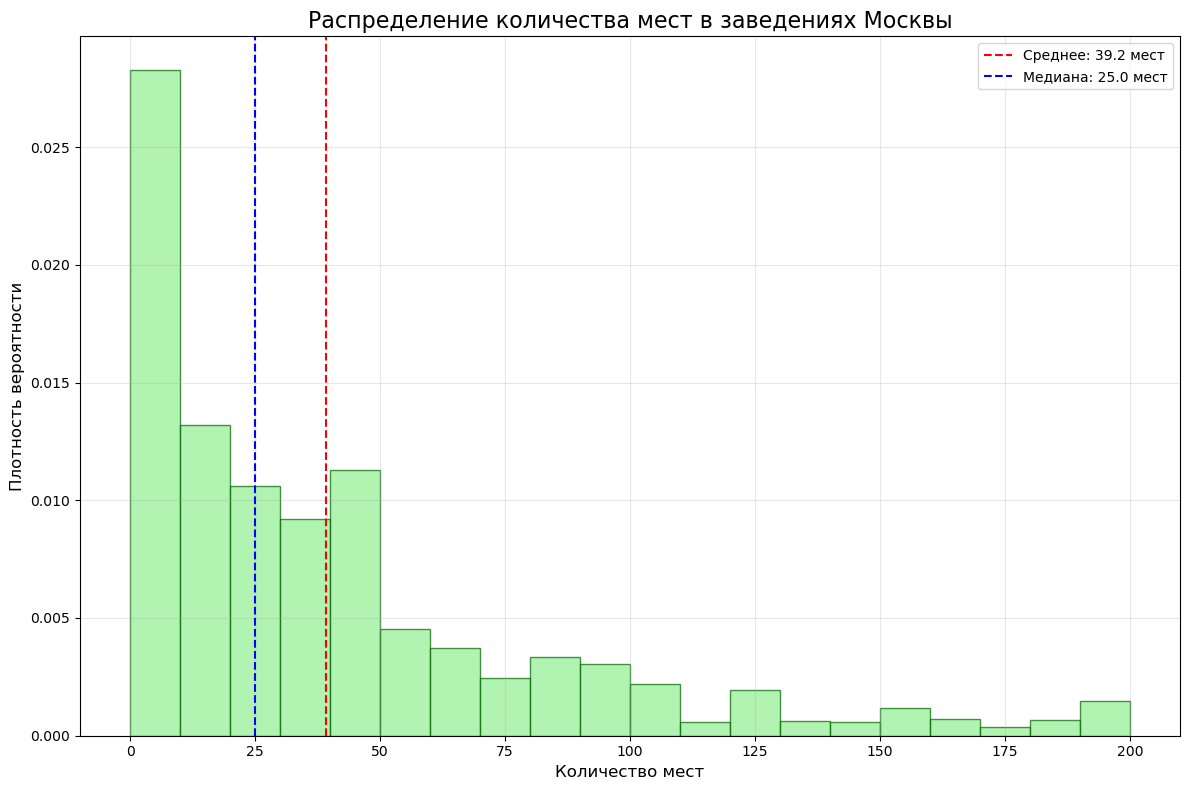

Гистограмма показывает распределение 16285 заведений по количеству мест


In [7]:
# Задание 3: Histogram - Распределение количества мест в заведениях

# Создаем гистограмму распределения количества мест
plt.figure(figsize=(12, 8))

# Фильтруем данные (убираем выбросы)
seats_data = df['SeatsCount'].dropna()
seats_data = seats_data[seats_data <= 200]  # Убираем очень большие значения

n, bins, patches = plt.hist(seats_data, bins=20, density=True, alpha=0.7, 
                           color='lightgreen', edgecolor='darkgreen')

plt.title('Распределение количества мест в заведениях Москвы', fontsize=16)
plt.xlabel('Количество мест', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.grid(True, alpha=0.3)

# Добавляем статистику
mean_seats = np.mean(seats_data)
median_seats = np.median(seats_data)
plt.axvline(mean_seats, color='red', linestyle='--', label=f'Среднее: {mean_seats:.1f} мест')
plt.axvline(median_seats, color='blue', linestyle='--', label=f'Медиана: {median_seats:.1f} мест')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Гистограмма показывает распределение {len(seats_data)} заведений по количеству мест")

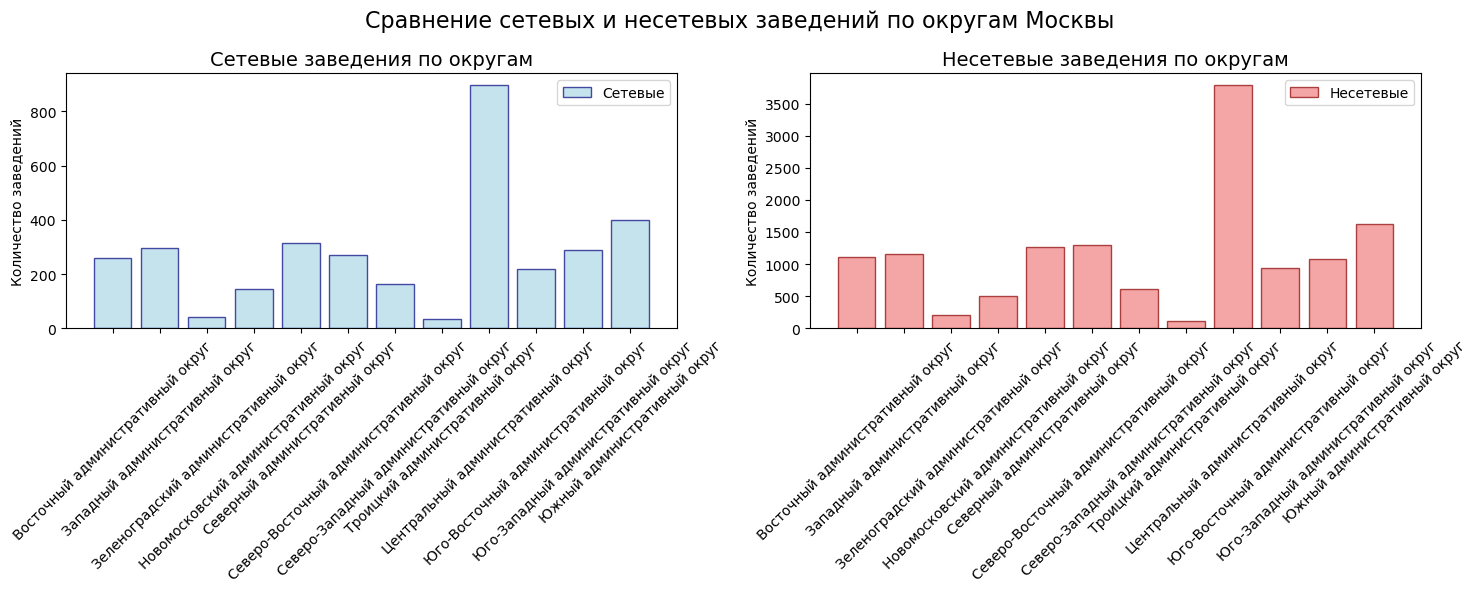

In [8]:
# Задание 4: Сравнительная гистограмма - Сетевые vs Несетевые заведения по округам

# Создаем сравнительную гистограмму
net_by_district = df.groupby(['AdmArea', 'IsNetObject']).size().unstack(fill_value=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма сетевых заведений
ax1.bar(net_by_district.index, net_by_district.get('да', 0), 
        color='lightblue', alpha=0.7, edgecolor='navy', label='Сетевые')
ax1.set_title('Сетевые заведения по округам', fontsize=14)
ax1.set_ylabel('Количество заведений')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Гистограмма несетевых заведений
ax2.bar(net_by_district.index, net_by_district.get('нет', 0), 
        color='lightcoral', alpha=0.7, edgecolor='darkred', label='Несетевые')
ax2.set_title('Несетевые заведения по округам', fontsize=14)
ax2.set_ylabel('Количество заведений')
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

plt.suptitle('Сравнение сетевых и несетевых заведений по округам Москвы', fontsize=16)
plt.tight_layout()
plt.show()

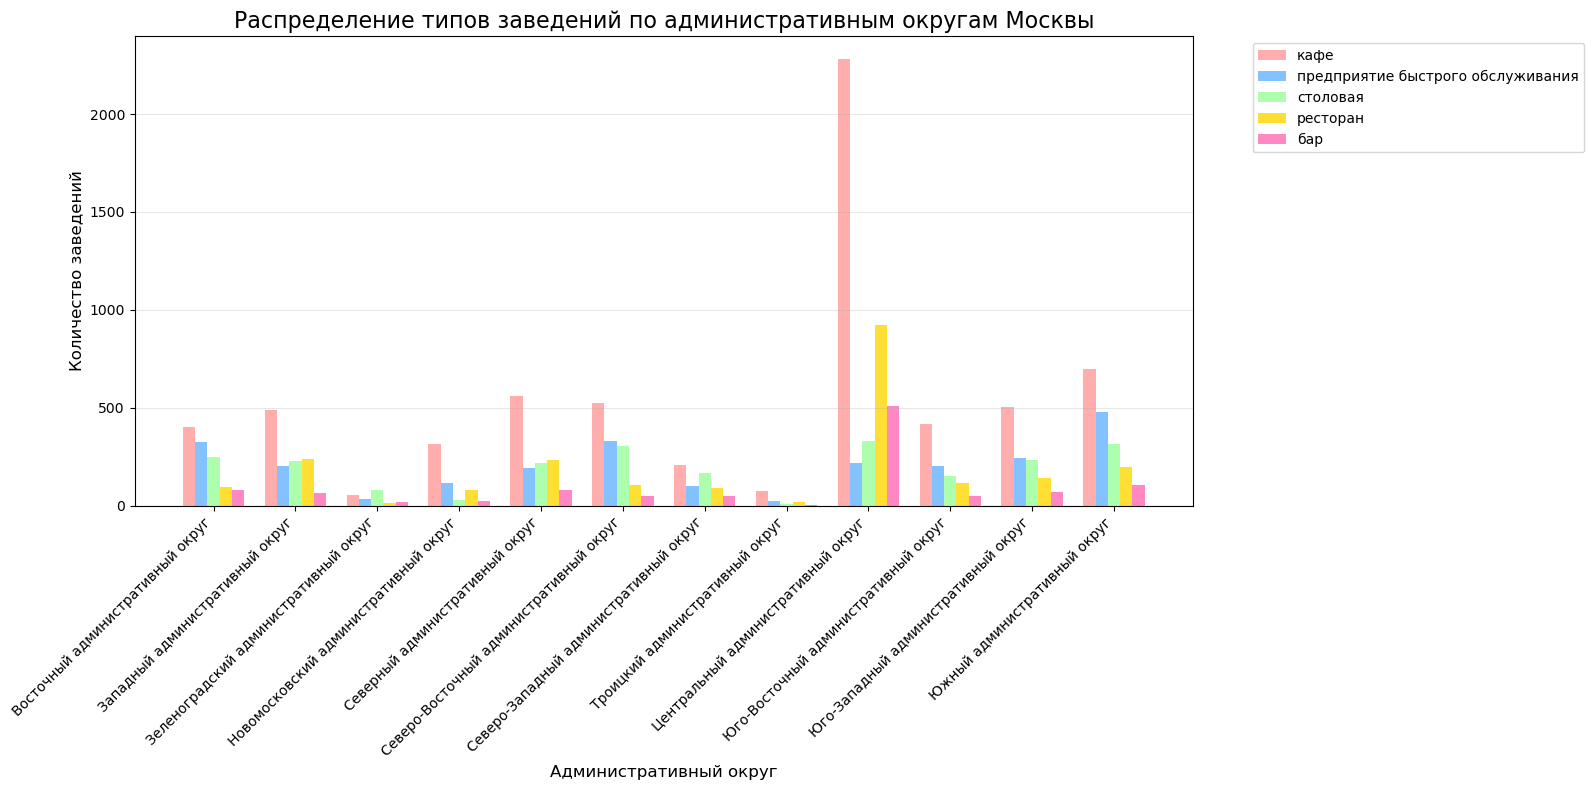

Grouped Bar Chart удобен для сравнения популярности типов заведений в разных округах


In [9]:
# Задание 5: Grouped Bar Chart - Сравнение типов заведений по округам

# Готовим данные для grouped bar chart
top_5_types = df['TypeObject'].value_counts().head(5).index
comparison_data = df[df['TypeObject'].isin(top_5_types)].groupby(['AdmArea', 'TypeObject']).size().unstack(fill_value=0)

x = np.arange(len(comparison_data.index))
width = 0.15

plt.figure(figsize=(16, 8))

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FF69B4']
for i, obj_type in enumerate(top_5_types):
    plt.bar(x + i*width, comparison_data[obj_type], width, 
            label=obj_type, alpha=0.8, color=colors[i])

plt.title('Распределение типов заведений по административным округам Москвы', fontsize=16)
plt.xlabel('Административный округ', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(x + width*2, comparison_data.index, rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Grouped Bar Chart удобен для сравнения популярности типов заведений в разных округах")

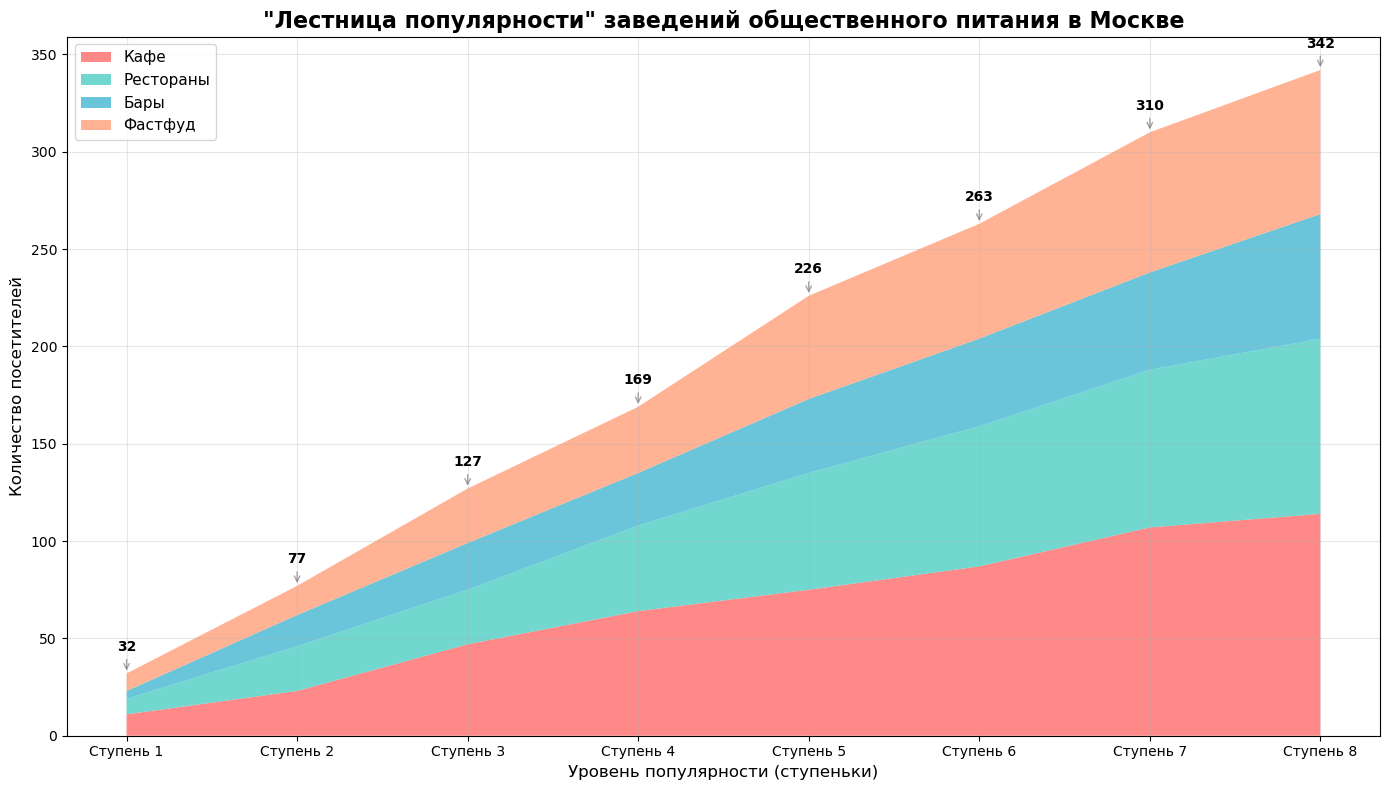

Stacked Area Chart в виде лестницы показывает рост популярности разных типов заведений
Каждая 'ступенька' представляет уровень популярности, а цвета - вклад разных типов заведений


In [14]:
# Задание 6: Stacked Area Chart - "Лестница" заведений по рейтингу популярности

# Создаем искусственные данные для рейтинга популярности на основе реальных характеристик
# Предположим, что популярность зависит от количества мест и типа заведения

# Создаем DataFrame с данными для лестницы
np.random.seed(42)
num_steps = 8  # Количество ступенек лестницы

# Создаем данные для stacked area chart
steps = np.arange(1, num_steps + 1)

# Генерируем данные для разных типов заведений (имитация роста популярности)
cafe_popularity = [10 + i*15 + np.random.randint(-5, 10) for i in range(num_steps)]
restaurant_popularity = [5 + i*12 + np.random.randint(-3, 8) for i in range(num_steps)]
bar_popularity = [3 + i*8 + np.random.randint(-2, 6) for i in range(num_steps)]
fastfood_popularity = [8 + i*10 + np.random.randint(-4, 7) for i in range(num_steps)]

plt.figure(figsize=(14, 8))
plt.stackplot(steps, [cafe_popularity, restaurant_popularity, bar_popularity, fastfood_popularity],
              labels=['Кафе', 'Рестораны', 'Бары', 'Фастфуд'], 
              colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], alpha=0.8)

plt.title('"Лестница популярности" заведений общественного питания в Москве', fontsize=16, fontweight='bold')
plt.xlabel('Уровень популярности (ступеньки)', fontsize=12)
plt.ylabel('Количество посетителей', fontsize=12)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)

# Добавляем аннотации для каждой ступеньки
for i in range(num_steps):
    total = cafe_popularity[i] + restaurant_popularity[i] + bar_popularity[i] + fastfood_popularity[i]
    plt.annotate(f'{total}', xy=(i+1, total), xytext=(i+1, total+10),
                ha='center', va='bottom', fontsize=10, fontweight='bold',
                arrowprops=dict(arrowstyle='->', color='gray', alpha=0.7))

plt.xticks(steps, [f'Ступень {i}' for i in steps])
plt.tight_layout()
plt.show()

print("Stacked Area Chart в виде лестницы показывает рост популярности разных типов заведений")
print("Каждая 'ступенька' представляет уровень популярности, а цвета - вклад разных типов заведений")

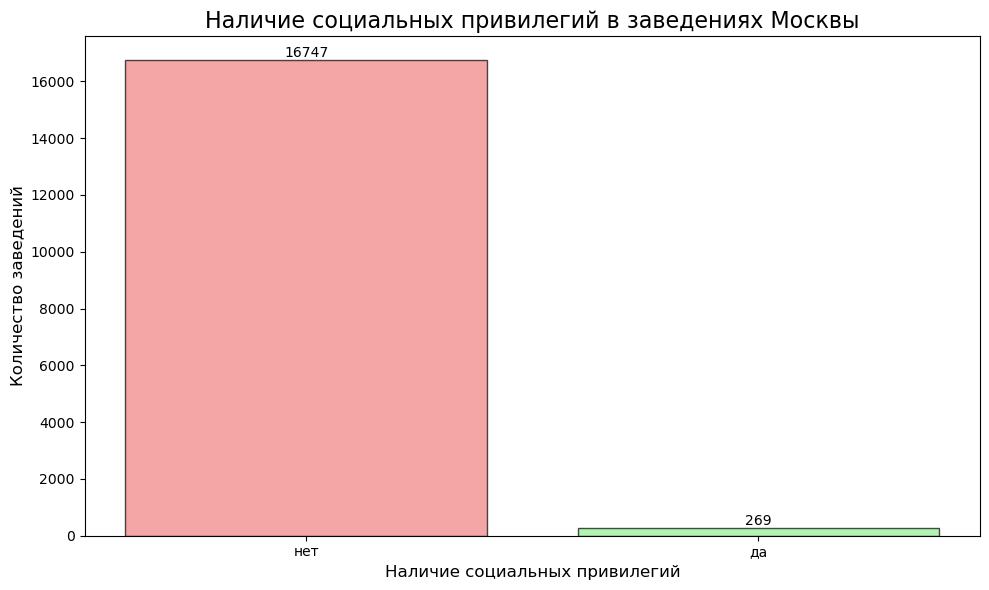

Простой Bar Chart эффективно показывает соотношение заведений с социальными привилегиями


In [11]:
# Дополнительное задание: Анализ социальных привилегий

# Bar Chart для социальных привилегий
social_counts = df['SocialPrivileges'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(social_counts.index, social_counts.values, 
               color=['lightcoral', 'lightgreen'], alpha=0.7, edgecolor='black')

plt.title('Наличие социальных привилегий в заведениях Москвы', fontsize=16)
plt.xlabel('Наличие социальных привилегий', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)

# Добавляем подписи
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
